# Practice Session 08: Connected components and k-core decomposition

Author: <font color="blue">Rubén Vera Martínez</font>

E-mail: <font color="blue">ruben.vera01@estudiant.upf.edu</font>

Date: <font color="blue">02/11/2021</font>

# 1. The Star Wars graph

In [ ]:
import io
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import statistics

In [ ]:
INPUT_GRAPH_FILENAME = "starwars.graphml"

In [ ]:
# LEAVE AS-IS

# Read the graph in GraphML format
g_in = nx.read_graphml(INPUT_GRAPH_FILENAME)

# Re-label the nodes so they use the 'name' as label
g_relabeled = nx.relabel.relabel_nodes(g_in, dict(g_in.nodes(data='name')))

# Convert the graph to undirected
g = g_relabeled.to_undirected()

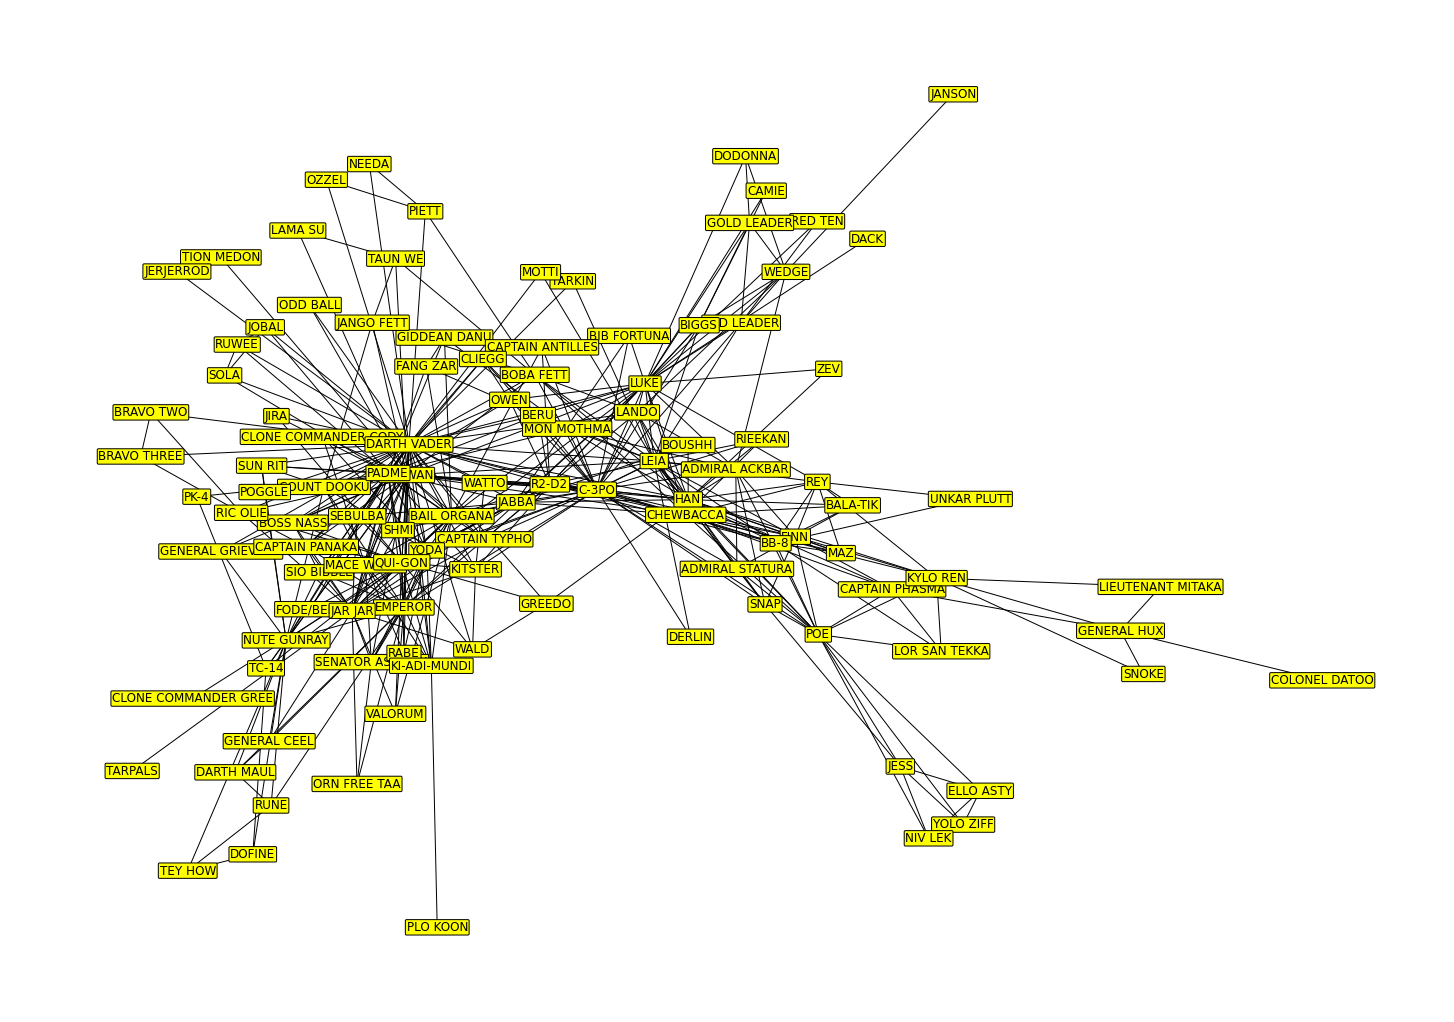

In [ ]:
# LEAVE AS-IS (OR MODIFY IF YOU WANT)

def plot_graph(g):

    # Create a plot of 20x14
    plt.figure(figsize=(20,14))

    # Layout the nodes using a spring model
    nx.draw_spring(g, with_labels=True, node_size=1, bbox=dict(facecolor="yellow", edgecolor='black', boxstyle='round,pad=0.1'))

    # Display
    plt.show()
    
plot_graph(g)

Si, ya que cada nodo tiene grado > 1.

In [ ]:
degree = [0.0]*g.number_of_nodes()
j = 0
for i in g.nodes():
  for u in g.edges():
    if i == u[0] or i == u[1]:
      degree[j] += 1
  j += 1
print("El average de grado es:", statistics.mean(degree))
print("La desviacion standard es:",statistics.stdev(degree))
print("El grado maximo es:", np.max(degree))
print("La moda del grado es:", statistics.mode(degree))

El average de grado es: 8.072727272727272
La desviacion standard es: 8.681636309331685
El grado maximo es: 52.0
La moda del grado es: 4.0


Esta red no es una red libre de escala por el hecho de que la desviación standard no equivale al cuadrado del average.

# 2. Remove a fraction of edges

In [ ]:
# LEAVE AS-IS

def remove_edges_uniformly_at_random(g_in, p):
    # Check input is within bounds
    if p < 0.0 or p > 1.0:
        raise ValueError
    
    # Create a copy of the input graph
    g_out = g_in.copy()
    
    # Decide how many edges should be in the output graph
    target_num_edges = int((1.0-p) * g_in.number_of_edges())

    # While there are more edges than desired
    while g_out.number_of_edges() > target_num_edges:
        
        # Remove one random edge
        edge = random.choice(list(g_out.edges()))
        
        if g_out.has_edge(edge[0], edge[1]):
            g_out.remove_edge(edge[0], edge[1])
    
    # Return the resulting graph
    return g_out

In [ ]:
g10 = remove_edges_uniformly_at_random(g, 0.1)
g50 = remove_edges_uniformly_at_random(g, 0.5)
g90 = remove_edges_uniformly_at_random(g, 0.9)

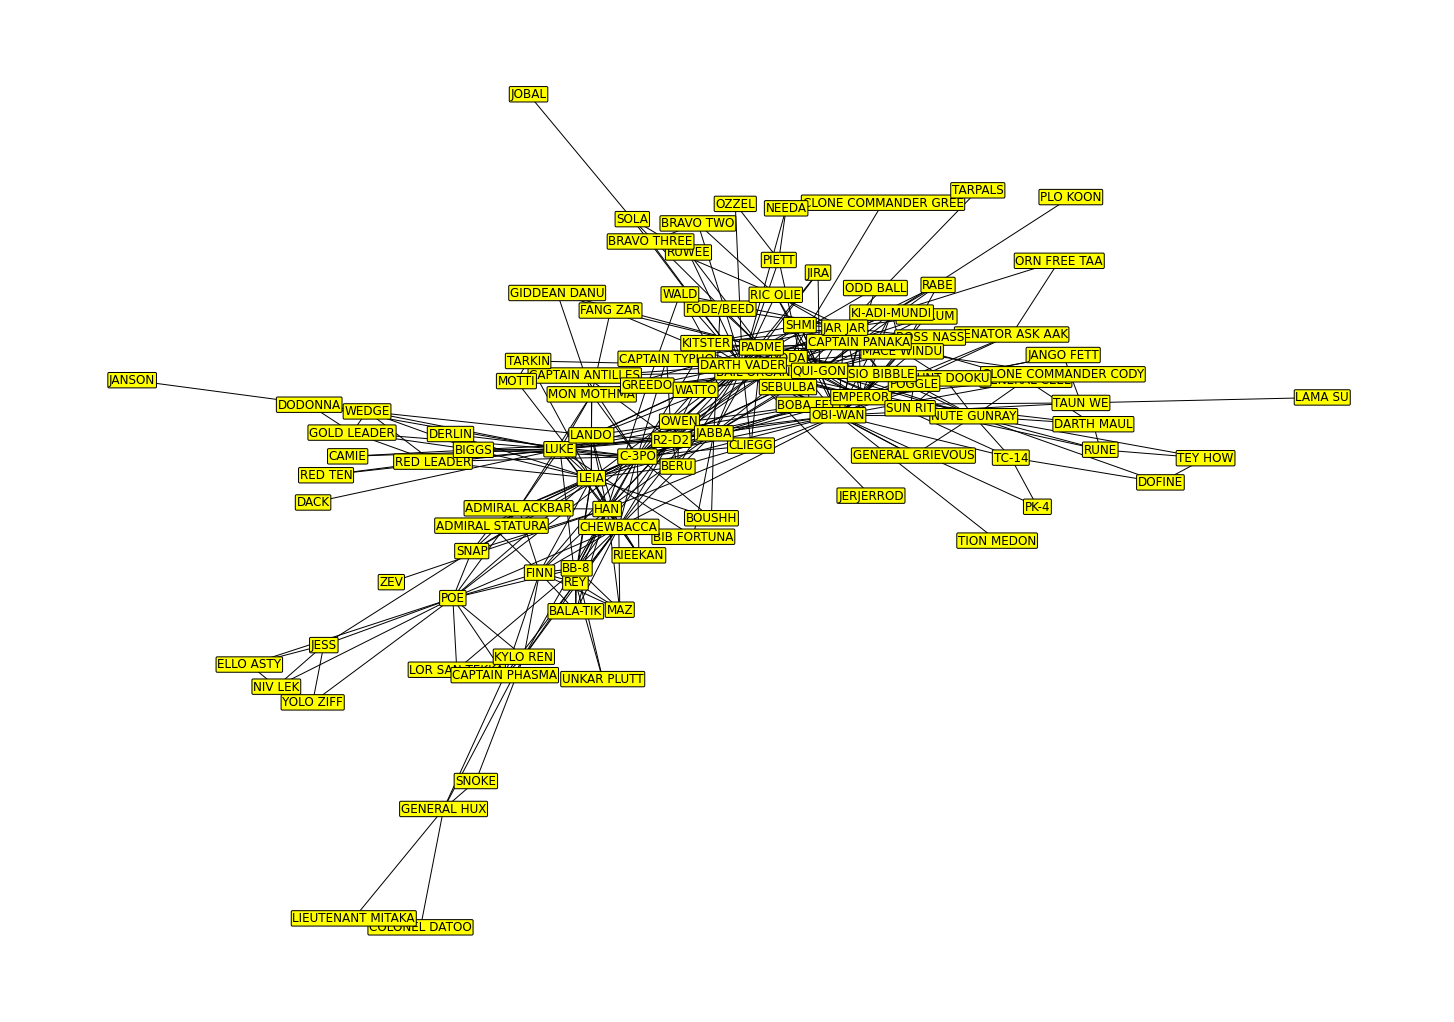

In [ ]:
plot_graph(g10)

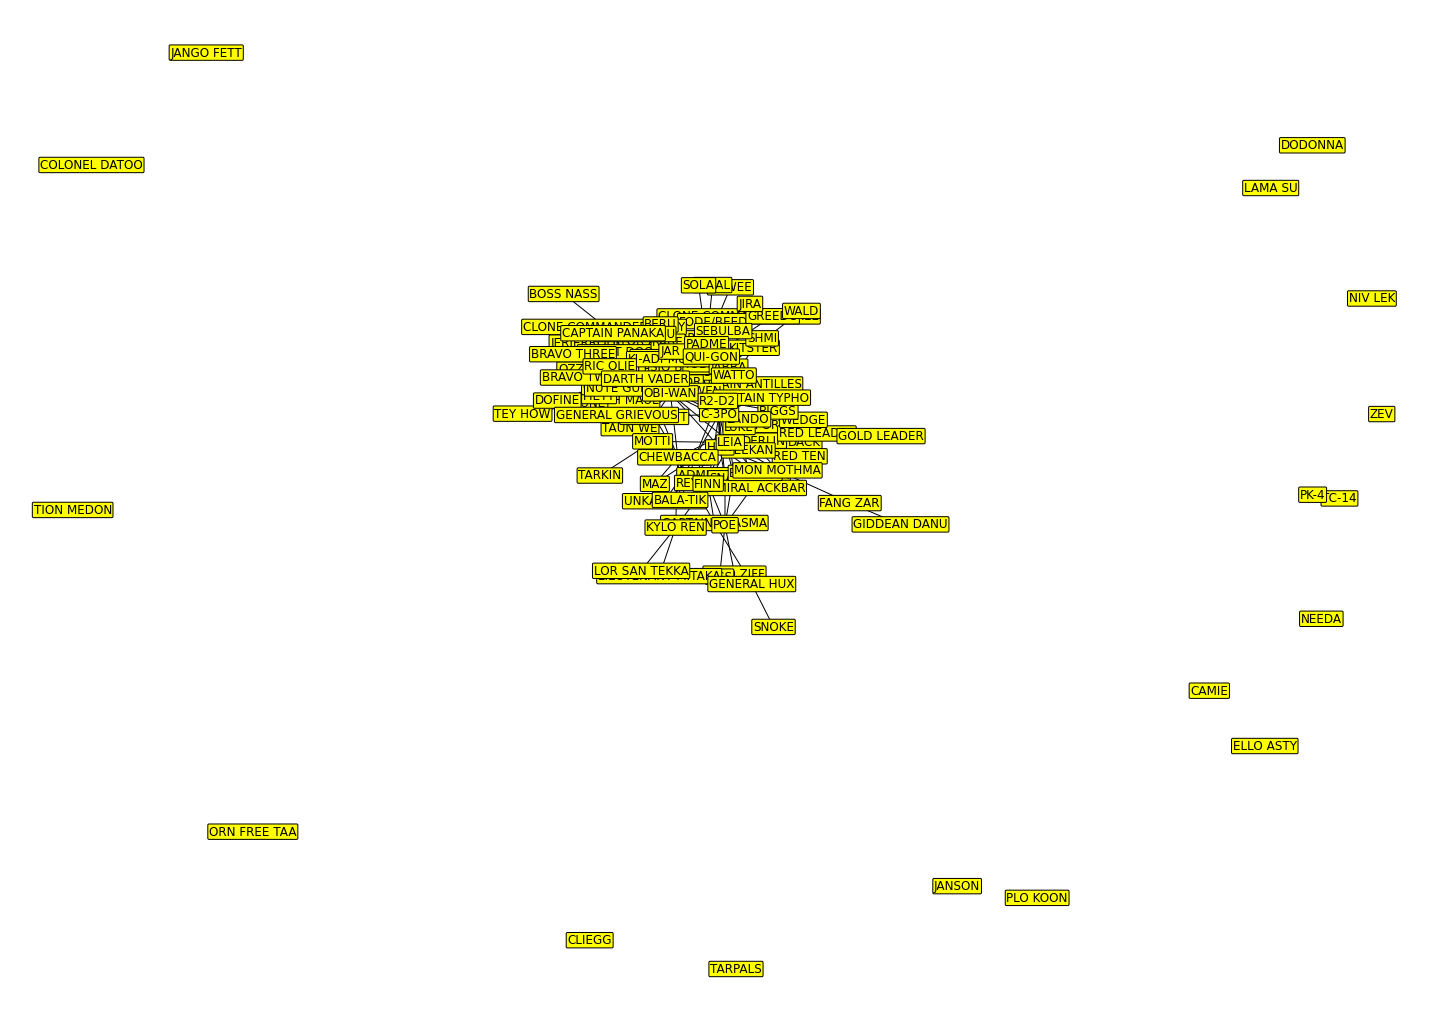

In [ ]:
plot_graph(g50)

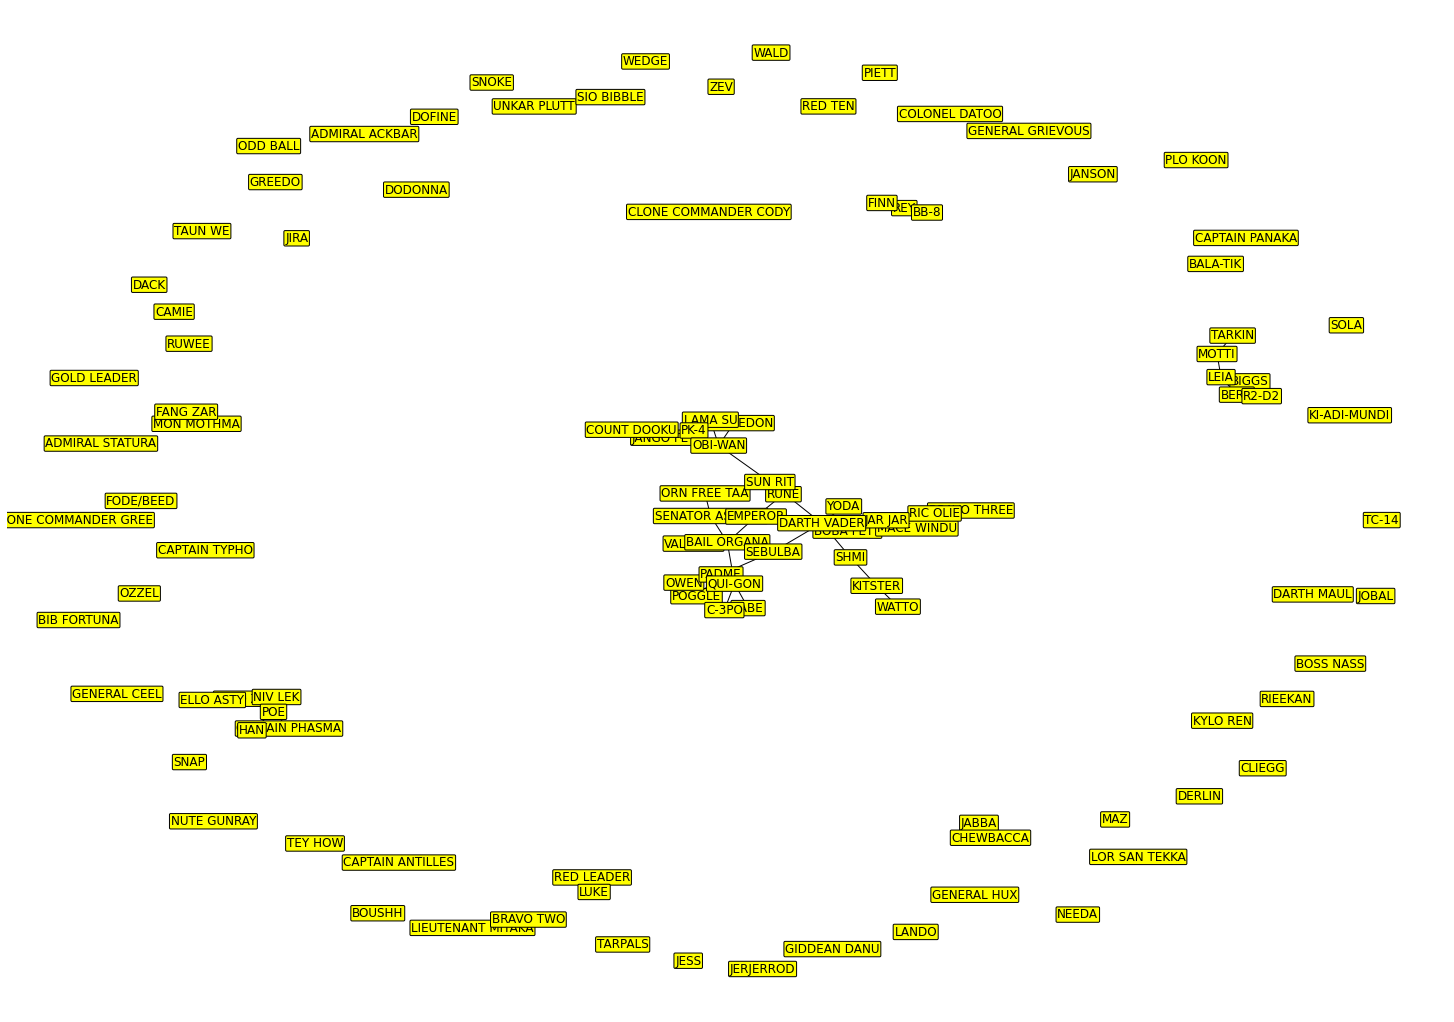

In [ ]:
plot_graph(g90)

A medida que hay menor porcentaje de enlaces vemos como aquellos nodos que tenian grado bajo han acabado siendo singletons, las componentes conexas mas pequeñas han acabado desconectandose y la componente conexa con mayor tamaño se ha mantenido conectada, aunque con muchos menos enlaces que en el grafo original por motivos obvios.

In [ ]:
# LEAVE AS-IS

def remove_edges_by_betweenness(g_in, p):
    # Check input is within bounds
    if p < 0.0 or p > 1.0:
        raise ValueError
        
    # Create a copy of the input graph
    g_out = g_in.copy()
    
    # Compute edge betweenness
    edge_betweenness = nx.algorithms.centrality.edge_betweenness(g_out)
    edges_by_betweenness = sorted(edge_betweenness.items(), key=lambda x:x[1], reverse=True)
    
    # Decide how many edges should be in the output graph
    target_num_edges = int((1.0-p) * g_in.number_of_edges())

    # While there are more edges than desired
    while g_out.number_of_edges() > target_num_edges:
        
        to_remove = edges_by_betweenness.pop(0)
        edge_to_remove = to_remove[0]
                
        g_out.remove_edge(edge_to_remove[0], edge_to_remove[1])
    
    # Return the resulting graph
    return g_out

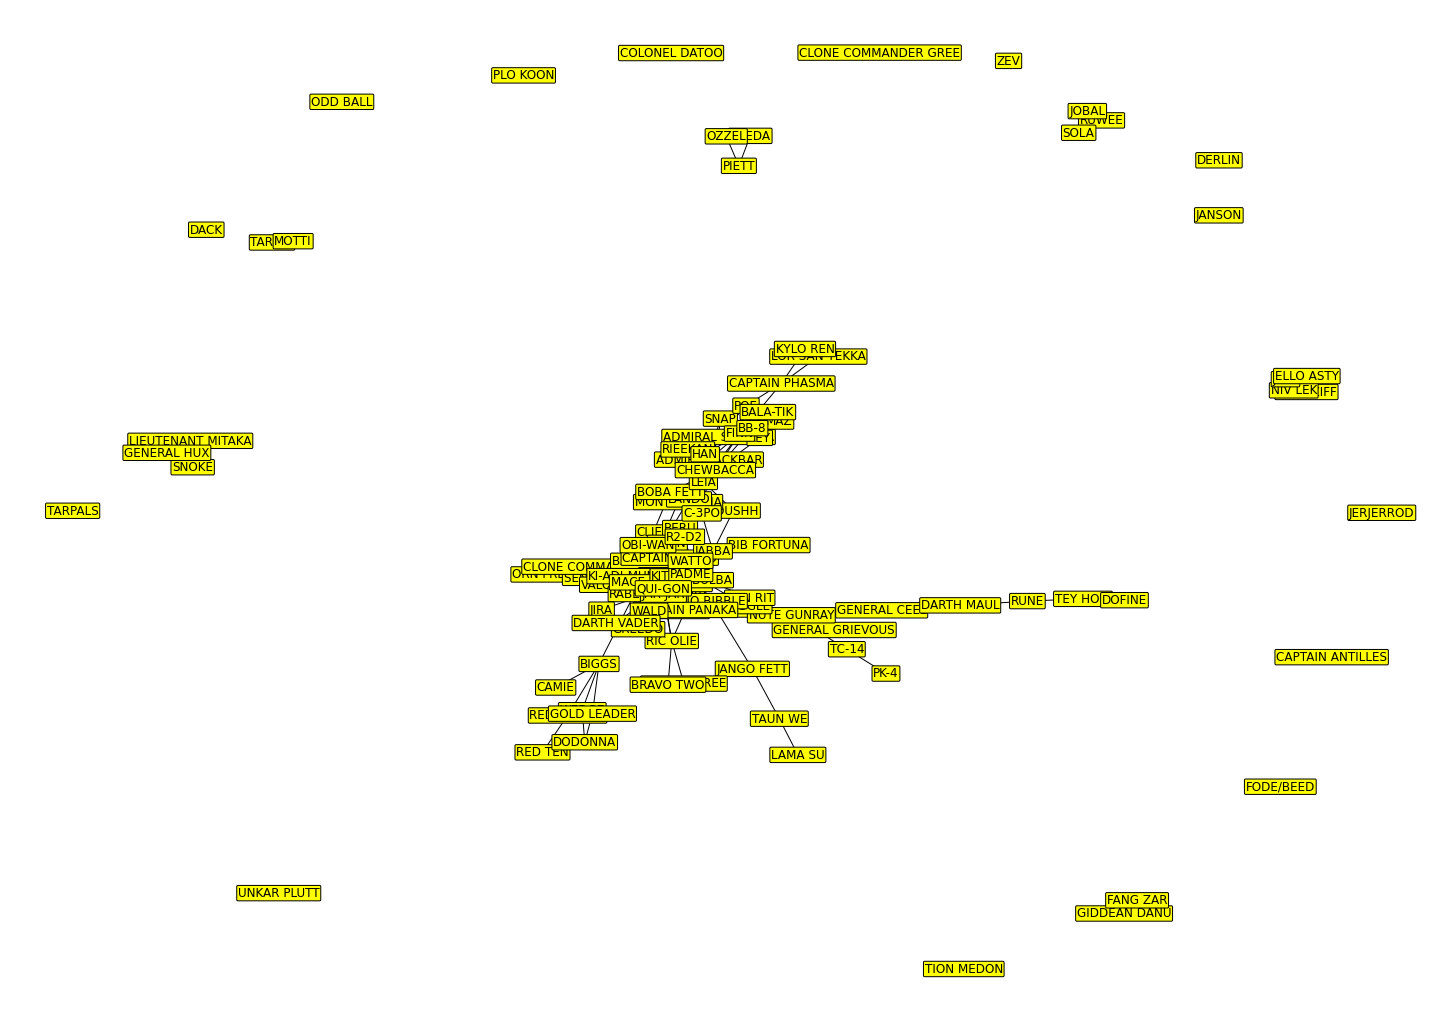

In [ ]:
# LEAVE AS-IS

g50b = remove_edges_by_betweenness(g, 0.50)
plot_graph(g50b)

Por probabilidad coincidiran los dos metodos al eliminar enlaces ya que los nodos con menor grado tendran mas probabilidad de quedarse desconectados, y estos también tienen poco betweenness por lo que tambien se quedaran desconectados, las diferencias que puede haber con algunos nodos es por el simple hecho de la aleatoriedad

# 3. Number of connected components

In [ ]:
def assign_component_recursive(g, node2componentid, starting_node, componentid):
  node2componentid[starting_node] = componentid
  for neighbor in g.neighbors(starting_node):
    if neighbor not in node2componentid:
      assign_component_recursive(g, node2componentid, neighbor, componentid)

In [ ]:
def assign_component(g):
  node2componentid = {}
  componentid = 1
  for n in g.nodes():
    if n not in node2componentid:
      assign_component_recursive(g, node2componentid, n, componentid)
      componentid += 1
  return node2componentid

In [ ]:
# LEAVE AS-IS

def count_connected_components(g):
    # Call the function to assign each node to a connected component
    node2componentid = assign_component(g)
    
    # Count the number of distinct values in this assignment
    return len(set(node2componentid.values()))

In [ ]:
# LEAVE AS-IS

def generate_graphs_by_removing_edges(graph, method):
    ncomponents_after_reducing = {}
    for p in np.arange(0.0, 1.02, 0.02):
        print("- {:.0f}% of the nodes".format(p*100))
        reduced_graph = method(graph, p)
        ncomponents_after_reducing[p] = count_connected_components(reduced_graph)
    return ncomponents_after_reducing

print("Generating graphs by removing edges uniformly at random")
components_removing_uniformly_at_random = generate_graphs_by_removing_edges(g, remove_edges_uniformly_at_random)

print("Generating graphs by removing edges by betweenness")
components_removing_by_betweenness = generate_graphs_by_removing_edges(g, remove_edges_by_betweenness)

Generating graphs by removing edges uniformly at random
- 0% of the nodes
- 2% of the nodes
- 4% of the nodes
- 6% of the nodes
- 8% of the nodes
- 10% of the nodes
- 12% of the nodes
- 14% of the nodes
- 16% of the nodes
- 18% of the nodes
- 20% of the nodes
- 22% of the nodes
- 24% of the nodes
- 26% of the nodes
- 28% of the nodes
- 30% of the nodes
- 32% of the nodes
- 34% of the nodes
- 36% of the nodes
- 38% of the nodes
- 40% of the nodes
- 42% of the nodes
- 44% of the nodes
- 46% of the nodes
- 48% of the nodes
- 50% of the nodes
- 52% of the nodes
- 54% of the nodes
- 56% of the nodes
- 58% of the nodes
- 60% of the nodes
- 62% of the nodes
- 64% of the nodes
- 66% of the nodes
- 68% of the nodes
- 70% of the nodes
- 72% of the nodes
- 74% of the nodes
- 76% of the nodes
- 78% of the nodes
- 80% of the nodes
- 82% of the nodes
- 84% of the nodes
- 86% of the nodes
- 88% of the nodes
- 90% of the nodes
- 92% of the nodes
- 94% of the nodes
- 96% of the nodes
- 98% of the nodes

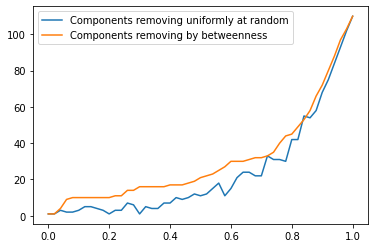

In [ ]:
x_vals = sorted(components_removing_uniformly_at_random.keys())
y_vals = [components_removing_uniformly_at_random[x] for x in x_vals ]
y_vals_betweenness = [components_removing_by_betweenness[x] for x in x_vals ]
plt.plot(x_vals, y_vals, label = 'Components removing uniformly at random')
plt.plot(x_vals, y_vals_betweenness, label = 'Components removing by betweenness')
plt.legend()

Se puede apreciar que a medida que vamos eliminando enlaces, el numero de componentes conexas va aumentando, al haber muchos nodos con grado bajo, la probabilidad de que al eliminar un enlace se cree una componente conexa nueva es alta, ya sea eliminado el enlace aleatoriamente(aunque en este caso tardara un poco mas) que por betweenness

# 4. Largest connected component

In [ ]:
def size_largest_connected_component(g):
  d = assign_component(g)
  n_connected_components = np.max(list(d.values()))
  size = {}
  for n in range(n_connected_components):
    size[n] = 0
  for i in g.nodes():
    for n in range(n_connected_components):
      if n == d[i]:
        size[n]+=1
  return np.max(list(size.values()))

In [ ]:
largest_wcc_removing_uniformly_at_random = {}
largest_wcc_removing_by_betweenness = {}
for p in range(1,11):
  largest_wcc_removing_uniformly_at_random[p] = size_largest_connected_component(remove_edges_uniformly_at_random(g,p/10))
  largest_wcc_removing_by_betweenness[p] = size_largest_connected_component(remove_edges_by_betweenness(g,p/10))

In [ ]:
x_vals = sorted(largest_wcc_removing_uniformly_at_random.keys())
y_vals = [largest_wcc_removing_uniformly_at_random[x] for x in x_vals ]
y_vals2 = [largest_wcc_removing_by_betweenness[x] for x in x_vals ]

for i in range(10):
  x_vals[i] /= 10
  y_vals[i] /= g.number_of_nodes()
  y_vals2[i] /= g.number_of_nodes()
plt.plot(x_vals, y_vals, label = 'Largest component removing uniformly at random')
plt.plot(x_vals, y_vals2, label = 'Largest component removing by betweenness')
plt.legend()

1: Cuando miramos la linea azul, es decir eliminando las ramas de manera aleatoria, se observa como cuando la componente conexa mas grande es del 90% de los nodos es cuando se han eliminado el 55% de los enlaces aproximadamente
2: Cuando miramos la linea naranja, es decir eliminando las ramas segun su betweenness, vemos que eliminando un 10% de los enlaces ya obtenemos el 90% de los nodos.

# 5. K-core decomposition

In [ ]:
# LEAVE AS-IS

def get_max_degree(g):
    degree_sequence = [x[1] for x in g.degree()]
    return(max(degree_sequence))


def nodes_with_degree_less_or_equal_than(g, degree):
    nodes = []
    for node in g.nodes():
        if g.degree(node) <= degree:
            nodes.append(node)
    return nodes

In [ ]:
def kcore_decomposition(graph):
    g = graph.copy()
    max_degree = get_max_degree(g)

    node_to_level = {}
    for level in range(1, max_degree + 1):

        while True:
            # Obtain the list of nodes with degree <= level
            nodes_in_level = nodes_with_degree_less_or_equal_than(g, level)
            # Check if this list is empty
            if len(nodes_in_level) == 0:
                break
                # TO-DO: implement (one line)

            # If the list is not empty, assign the nodes to the
            # corresponding level and remove the node
            for node in nodes_in_level:
                node_to_level[node] = level
                g.remove_node(node)
                # TO-DO: implement this (two lines)

    return(node_to_level)

In [ ]:
# LEAVE AS-IS

node_to_kcore = kcore_decomposition(g)

for character in ["JANSON", "RED TEN", "LUKE", "YODA"]:
    print("K-core of {:s}: {:d}".format(character, node_to_kcore[character]))

In [ ]:
# LEAVE AS-IS

# Compute k-core decomposition
node_to_kcore = kcore_decomposition(g)

# Rename nodes so they include the k-core
node_to_kcore_texts = dict([(name, str(node_to_kcore[name]) + ":" + name) for name in g.nodes()])
h = nx.relabel_nodes(g, node_to_kcore_texts)

# Draw the graph
plt.figure(figsize=(20,20))
nx.draw_spring(h, with_labels=True, node_size=1, bbox=dict(facecolor="yellow", edgecolor='black', boxstyle='round,pad=0.1'))
plt.show()

A más importantes sean los personajes mayor sera el nivel de k-core que se les asigna, y aquellos poco relevantes en la saga, tienen nivel bajo.

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>